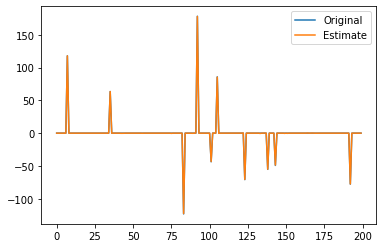

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

def ADMM(A, y):
    """Alternating Direction Method of Multipliers

    This is a python implementation of the Alternating Direction
    Method of Multipliers - a method of constrained optimisation
    that is used widely in statistics (http://stanford.edu/~boyd/admm.html).

    This is simplified version, specifically for the LASSO
    """

    m, n = A.shape
    A_t_A = A.T.dot(A)
    w, v = np.linalg.eig(A_t_A)
    MAX_ITER = 10000

    #Function to caluculate min 1/2(y - Ax) + l||x||
    #via alternating direction methods
    x_hat = np.zeros([n, 1])
    z_hat = np.zeros([n, 1])
    u = np.zeros([n, 1])

    #Calculate regression co-efficient and stepsize
    r = np.amax(np.absolute(w))
    l_over_rho = sqrt(2*log(n, 10)) * r / 2.0 # I might be wrong here
    rho = 1/r

    #Pre-compute to save some multiplications
    A_t_y = A.T.dot(y)
    Q = A_t_A + rho * np.identity(n)
    Q = np.linalg.inv(Q)
    Q_dot = Q.dot
    sign = np.sign
    maximum = np.maximum
    absolute = np.absolute

    for _ in range(MAX_ITER):
        #x minimisation step via posterier OLS
        x_hat = Q_dot(A_t_y + rho*(z_hat - u))
        #z minimisation via soft-thresholding
        u = x_hat + u
        z_hat = sign(u) * maximum(0, absolute(u)-l_over_rho)
        #mulitplier update
        u = u - z_hat

    return z_hat

def test(m=50, n=200):
    """Test the ADMM method with randomly generated matrices and vectors"""
    A = np.random.randn(m, n)

    num_non_zeros = 10
    positions = np.random.randint(0, n, num_non_zeros)
    amplitudes = 100*np.random.randn(num_non_zeros, 1)
    x = np.zeros((n, 1))
    x[positions] = amplitudes

    y = A.dot(x) + np.random.randn(m, 1)

    plot(x, ADMM(A,y))

def plot(original, computed):
    """Plot two vectors to compare their values"""
    plt.plot(original, label='Original')
    plt.plot(computed, label='Estimate')

    plt.legend(loc='upper right')

    plt.show()

if __name__ == "__main__":
    test()